In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
import time
from IPython import display
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 40 
plt.rcParams['axes.labelpad'] = 16 

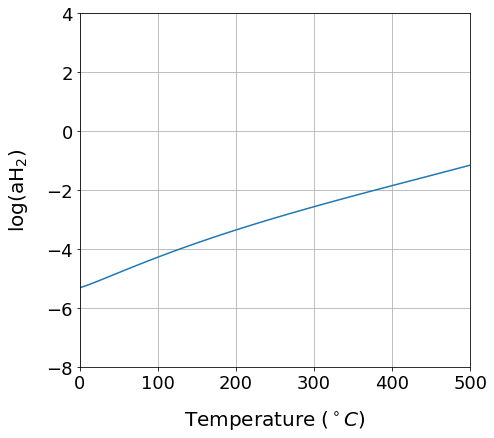

In [182]:
#First let's calculte hydrogen fugacity within our temperature range, 0-500

#The FMQ buffer: 1.5Fe2SiO4 + H2O → Fe3O4 + 1.5SiO2 + H2
#logK = log(aH2) (all other activities are 1)
#T = 0 to 500 in increments of 50 deg C
T = np.arange(0,510,10)
K_FMQ = np.loadtxt('log_FMQ.txt')
#K_FMQ = np.array([-2.76355657, -2.39075547, -2.03342326, -1.68463679, -1.33759928, -0.98624673, -0.62674241, -0.26687566, 0.07836855, 0.40244898, 0.70161932])
log_H2 = K_FMQ

fig1 = plt.figure(1)
fig1.set_figheight(6.5)
fig1.set_figwidth(7)
plt.clf()
plt.plot(T,log_H2)
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('log(aH$_2$)')
plt.xlim(0, 500)
plt.ylim(-8,4)
#plt.legend(bbox_to_anchor=(0.98,0.5), prop={'size': 16})
#plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
plt.savefig('logH2_FMQ.png')
plt.show()

In [183]:
#All values at 1500 bar
#Calculate pH neutral
Kw = np.loadtxt('Kw.txt')
pH_neutral = -0.5*Kw

#Change the pH
pH = np.zeros([3,len(pH_neutral)])
pH[0] = pH_neutral - 3
pH[1] = pH_neutral
pH[2] = pH_neutral + 3

#logK values for speciation reactions:
#1 : CH4 + 2H2O → CO2 + 4H2
K_CO2 = np.loadtxt('K_CO2.txt')
#2: CH4 +3H2O → HCO3 +H +4H2
K_HCO3 = np.loadtxt('HCO3.txt')
#3: CH4+3H2O→CO2−+2H++4H2
K_CO3 = np.loadtxt('K_CO3.txt')

#mole fractions - all WRT CH4
X_CO2 = np.zeros([3,len(T)])
X_CH4 = np.zeros([3,len(T)])
X_CO3 = np.zeros([3,len(T)])
X_HCO3 = np.zeros([3,len(T)]) 
CO2 = np.zeros([3,len(T)])
HCO3 = np.zeros([3,len(T)])
CO3 = np.zeros([3,len(T)]) 
for i in range(0, 3):
    X_CO2[i] = (10**(K_CO2))/((10**log_H2)**4)
    X_HCO3[i] = (10**K_HCO3)/((10**-pH[i])*((10**log_H2)**4))
    X_CO3[i] = (10**K_CO3)/(((10**-pH[i])**2)*((10**log_H2)**4))
    X_CH4[i] = 1/(1 + X_CO2[i] + X_HCO3[i] + X_CO3[i])
    CO2[i,:] = X_CO2[i,:]*X_CH4[i,:]
    HCO3[i,:] = X_HCO3[i,:]*X_CH4[i,:]
    CO3[i,:] = X_CO3[i,:]*X_CH4[i,:]

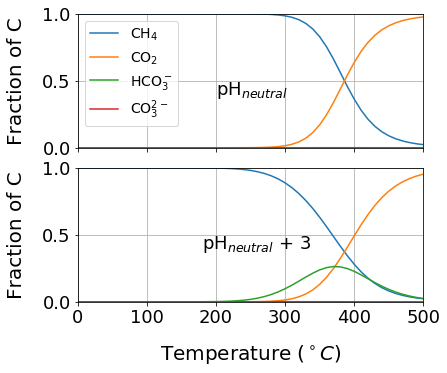

In [184]:
fig2 = plt.figure(2)

# ax = plt.subplot(311) 
# plt.plot(T,X_CH4[0], label = 'CH$_4$')
# plt.plot(T,CO2[0], label = 'CO$_2$')
# plt.plot(T,HCO3[0], label = 'HCO$_3^-$')
# plt.plot(T,CO3[0], label = 'CO$_3^{2-}$')
# #plt.xlabel('Temperature ($^\circ C$)')
# plt.ylabel('Fraction of C')
# plt.xlim(0, 500)
# plt.ylim(0,1)
# #plt.legend(bbox_to_anchor=(0.98,0.5), prop={'size': 16})
# #plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
# plt.grid()
# plt.title(r'FMQ buffer and pH$_{neutral}$')
# #plt.savefig('logH2_FMQNeutral.png')
# plt.setp(ax.get_xticklabels(), visible=False)
# plt.legend(bbox_to_anchor=(0.3,0.85), prop={'size': 18})

ax = plt.subplot(211) 
plt.plot(T,X_CH4[1], label = 'CH$_4$')
plt.plot(T,CO2[1], label = 'CO$_2$')
plt.plot(T,HCO3[1], label = 'HCO$_3^-$')
plt.plot(T,CO3[1], label = 'CO$_3^{2-}$')
#plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Fraction of C')
plt.xlim(0, 500)
plt.ylim(0,1)
plt.setp(ax.get_xticklabels(), visible=False)
#plt.legend(bbox_to_anchor=(0.98,0.5), prop={'size': 16})
#plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
plt.legend(prop={'size': 14})
plt.text(200, 0.4, r'pH$_{neutral}$',size = 18)
#plt.title(r'FMQ buffer and pH$_{neutral}$')
#plt.savefig('logH2_FMQNeutral.png')

ax = plt.subplot(212) 
plt.plot(T,X_CH4[2], label = 'CH$_4$')
plt.plot(T,CO2[2], label = 'CO$_2$')
plt.plot(T,HCO3[2], label = 'HCO$_3^-$')
plt.plot(T,CO3[2], label = 'CO$_3^{2-}$')
plt.xlabel('Temperature ($^\circ C$)')
plt.ylabel('Fraction of C')
plt.text(180, 0.4, r'pH$_{neutral}$ + 3',size = 18)
plt.xlim(0, 500)
plt.ylim(0,1)
#plt.legend(bbox_to_anchor=(0.98,0.5), prop={'size': 16})
#plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.grid()
#plt.title(r'FMQ buffer and pH$_{neutral}$')
#plt.savefig('logH2_FMQNeutral.png')
plt.subplots_adjust(left = 1.0, bottom=2.5, right=1.8, top=3.5,
                 wspace=0.07, hspace=0.15)
plt.show()

plt.savefig('carbon_spec.png')

In [185]:
(10**(K_CO2))/((10**log_H2)**4)

array([  1.81871647e-18,   2.12946252e-17,   2.11375671e-16,
         1.80636288e-15,   1.34888523e-14,   8.91411023e-14,
         5.27076921e-13,   2.81525021e-12,   1.36985942e-11,
         6.11796517e-11,   2.52470128e-10,   9.68498606e-10,
         3.47214617e-09,   1.16899324e-08,   3.71228235e-08,
         1.11639016e-07,   3.19075898e-07,   8.69568902e-07,
         2.26640751e-06,   5.66483155e-06,   1.36120959e-05,
         3.15178076e-05,   7.04663862e-05,   1.52421068e-04,
         3.19532473e-04,   6.50286892e-04,   1.28666356e-03,
         2.47860317e-03,   4.65462824e-03,   8.53127615e-03,
         1.52782988e-02,   2.67615954e-02,   4.58916846e-02,
         7.71107629e-02,   1.27060629e-01,   2.05469328e-01,
         3.26305204e-01,   5.09234712e-01,   7.81429856e-01,
         1.17972287e+00,   1.75311336e+00,   2.56554715e+00,
         3.69898014e+00,   5.25645560e+00,   7.36500422e+00,
         1.01782708e+01,   1.38780357e+01,   1.86753608e+01,
         2.48090423e+01,

In [132]:
print(pH[1])
print(pH_neutral)

[ 7.158795  6.97829   6.813     6.661945  6.52382   6.3974    6.281575
  6.175365  6.077905  5.988425  5.90626   5.830795  5.76151   5.69793
  5.639635  5.58624   5.53742   5.49287   5.45232   5.415525  5.38227
  5.35235   5.325585  5.30181   5.280865  5.262605  5.246895  5.233605
  5.222625  5.21384   5.207155  5.20247   5.199705  5.198785  5.199645
  5.202225  5.206485  5.21238   5.21988   5.22896   5.239595  5.25178
  5.265495  5.28073   5.297485  5.31575   5.335505  5.35675   5.37946
  5.40361   5.429175]
[ 7.158795  6.97829   6.813     6.661945  6.52382   6.3974    6.281575
  6.175365  6.077905  5.988425  5.90626   5.830795  5.76151   5.69793
  5.639635  5.58624   5.53742   5.49287   5.45232   5.415525  5.38227
  5.35235   5.325585  5.30181   5.280865  5.262605  5.246895  5.233605
  5.222625  5.21384   5.207155  5.20247   5.199705  5.198785  5.199645
  5.202225  5.206485  5.21238   5.21988   5.22896   5.239595  5.25178
  5.265495  5.28073   5.297485  5.31575   5.335505  5.35675   